In [1]:
from models.candlestick import Candlestick
import pandas as pd
import numpy as np

def logDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    return x_diff

candlestick = Candlestick()

df = candlestick.to_df()

df



,open,high,close,low,volumn
date,,,,,
2018-05-23,7977.12,8031.90,7501.95,7425.00,42910.7
2018-05-24,7501.95,7730.73,7575.01,7266.99,37845.4
2018-05-25,7578.99,7649.55,7457.00,7308.15,26740.0
2018-05-26,7456.99,7620.00,7333.96,7300.00,19464.1
2018-05-27,7334.00,7400.00,7338.99,7231.11,18706.9
...,...,...,...,...,...
2021-02-11,44807.60,48678.90,47969.50,43994.00,89561.1
2021-02-12,47968.70,48985.80,47287.60,46125.00,85870.0
2021-02-13,47298.10,48150.00,47153.70,46202.50,63768.1


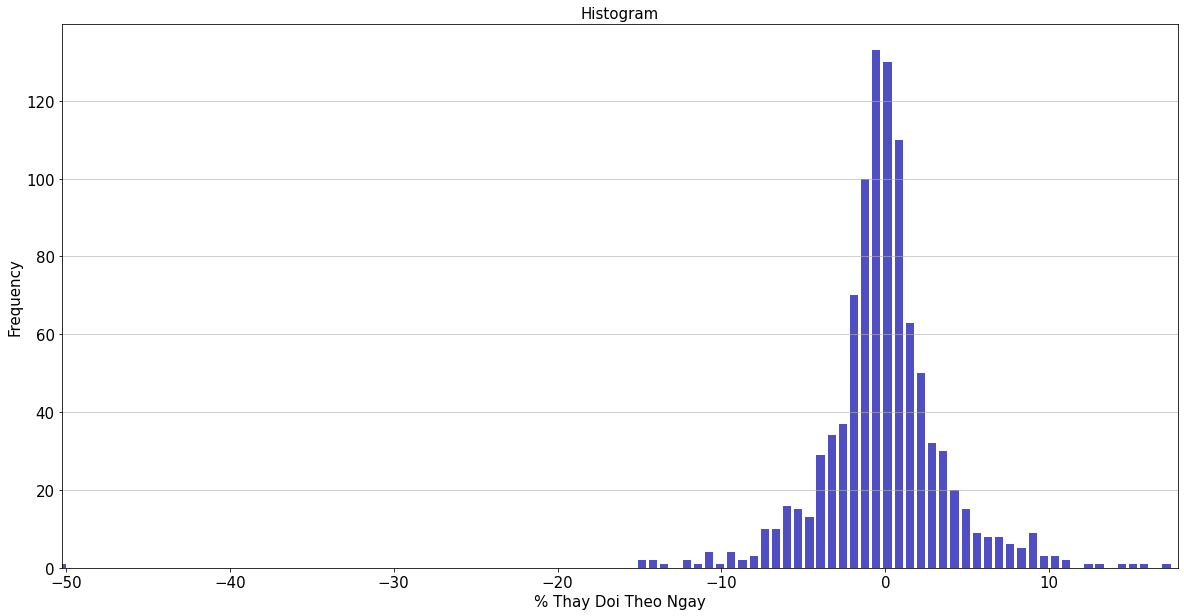

In [3]:
data = logDiff(df['close'])

import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure(figsize=(20,10))

# plt.plot(data, label='hp')

# plt.xlabel('date')
# plt.ylabel('Day change')
# plt.title('Graph')
# plt.grid(True)

# plt.legend()
# plt.show()
data = np.array(data.tolist())
data = data[~np.isnan(data)]

hist,bin_edges = np.histogram(data, bins=100)

# print(f"{hist},{bin_edges}")

plt.figure(figsize=[20,10])

plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('% Thay Doi Theo Ngay',fontsize=15)
plt.ylabel('Tan Suat',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histogram',fontsize=15)
plt.show()
